<a href="https://colab.research.google.com/github/19greg96/yolo-onlab/blob/master/onlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!git clone https://github.com/19greg96/yolo-onlab

Cloning into 'yolo-onlab'...
remote: Enumerating objects: 1454, done.
remote: Counting objects: 100% (1454/1454), done.
remote: Compressing objects: 100% (1022/1022), done.
remote: Total 1454 (delta 493), reused 1359 (delta 415), pack-reused 0
Receiving objects: 100% (1454/1454), 7.03 MiB | 5.50 MiB/s, done.
Resolving deltas: 100% (493/493), done.


In [0]:
!git pull https://github.com/19greg96/yolo-onlab

fatal: not a git repository (or any of the parent directories): .git


In [0]:
!ls

sample_data


In [0]:
import os
os.chdir('yolo-onlab/darknet-master/')

In [0]:
!ls

3rdparty	  data			 Makefile	uselib
backup		  image_yolov2.sh	 net_cam_v3.sh	video_v2.sh
build		  image_yolov3.sh	 obj		video_yolov3.sh
cfg		  include		 README.md	voc.names
darknet		  json_mjpeg_streams.sh  results
darknet.py	  libdarknet.so		 scripts
darknet_video.py  LICENSE		 src


In [0]:
!make GPU=1 LIBSO=1

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -fopenmp -DGPU -fPIC -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool MJPG_sender::write(const cv::Mat&)’:
./src/http_stream.cpp:256:23: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                 if (n < outlen)
                     ~~^~~~~~~~
./src/http_stream.cpp: In member function ‘void JSON_sender::close_all()’:
./src/http_stream.cpp:330:20: warning: ISO C++ forbids converting a string constant to ‘char*’ [-Wwrite-strings]
         write("\n]");   // close JSON array
                    ^
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(char*)’:
./src/http_stream.cpp:422:21: warning: unused variable ‘n’ [-Wunused-variable]
                

# Train

In [0]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/voc_label.py
!python voc_label.py
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt

--2019-02-27 10:19:49--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  61.6MB/s    in 31s     

2019-02-27 10:20:21 (60.6 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2019-02-27 10:20:22--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  29.6MB/s    in 9.5s    

2019-02-27 10:20:31 (46.3 MB/s) 

In [0]:
!ls data/

9k.tree     giraffe.jpg		      labels		readme.txt
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      onlab.names	test_onlab.txt
dog.jpg     imagenet.labels.list      openimages.names	train_onlab.txt
eagle.jpg   imagenet.shortnames.list  person.jpg	voc.names


In [0]:
!rm -rf data/obj/
!rm data/test_onlab.txt
!rm data/train_onlab.txt
!rm data.zip
!ls data/

rm: cannot remove 'data/test_onlab.txt': No such file or directory
rm: cannot remove 'data/train_onlab.txt': No such file or directory
rm: cannot remove 'data.zip': No such file or directory
9k.tree     eagle.jpg	 imagenet.labels.list	   openimages.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  person.jpg
coco.names  goal.txt	 labels			   scream.jpg
dog.jpg     horses.jpg	 onlab.names		   voc.names


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls "../../gdrive/My Drive/projects/"
!cp "../../gdrive/My Drive/projects/data_1.zip" "data.zip"
!unzip -q data.zip -d ./

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
data_1.zip  data_2.zip	si


# Train YoloV3 Tiny

In [0]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2019-03-01 09:08:09--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  15.5MB/s    in 2.2s    

2019-03-01 09:08:12 (15.5 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [0]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [9]:
!./darknet detector train cfg/onlab.data cfg/yolo3-tiny-onlab.cfg yolov3-tiny.conv.15 -map -dont_show

(mAP calc at 11334 iters. Last acc mAP@0.5 = 49.95 %) - 10151 / 20008: 4.147477, 4.009161 avg loss, 0.001000 learning rate, 1.665608 seconds, 649664 images
(mAP calc at 11334 iters. Last acc mAP@0.5 = 49.95 %) - 10152 / 20008: 3.520431, 3.960288 avg loss, 0.001000 learning rate, 1.771465 seconds, 649728 images
(mAP calc at 11334 iters. Last acc mAP@0.5 = 49.95 %) - 10153 / 20008: 3.756201, 3.939879 avg loss, 0.001000 learning rate, 1.773921 seconds, 649792 images
(mAP calc at 11334 iters. Last acc mAP@0.5 = 49.95 %) - 10154 / 20008: 3.430973, 3.888988 avg loss, 0.001000 learning rate, 1.749507 seconds, 649856 images
(mAP calc at 11334 iters. Last acc mAP@0.5 = 49.95 %) - 10155 / 20008: 2.884527, 3.788542 avg loss, 0.001000 learning rate, 1.764235 seconds, 649920 images
(mAP calc at 11334 iters. Last acc mAP@0.5 = 49.95 %) - 10156 / 20008: 2.798667, 3.689555 avg loss, 0.001000 learning rate, 1.766993 seconds, 649984 images
(mAP calc at 11334 iters. Last acc mAP@0.5 = 49.95 %) - 10157 / 

In [0]:
!ls backup/

2007_test.txt	darknet_video.py       results
2007_train.txt	data		       scripts
2007_val.txt	image_yolov2.sh        src
2012_train.txt	image_yolov3.sh        train.txt
2012_val.txt	include		       video_v2.sh
3rdparty	json_mjpeg_streams.sh  video_yolov3.sh
backup		LICENSE		       VOCdevkit
build		Makefile	       voc_label.py
cfg		net_cam_v3.sh	       voc.names
chart.png	obj		       VOCtest_06-Nov-2007.tar
darknet		predictions.jpg        VOCtrainval_06-Nov-2007.tar
darknet.py	README.md	       VOCtrainval_11-May-2012.tar


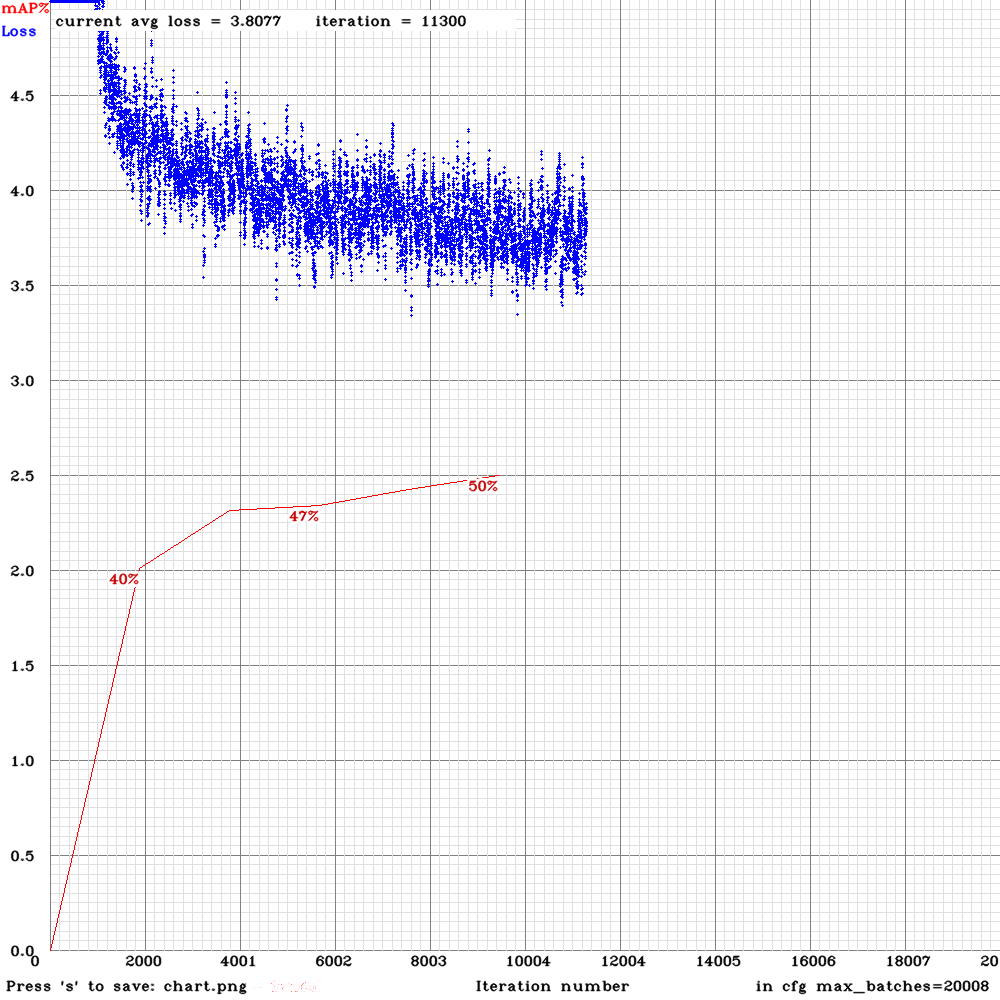

In [10]:
from IPython.display import Image
Image('chart.png')

In [11]:
!zip -r backup.zip backup

  adding: backup/ (stored 0%)
  adding: backup/yolo3-tiny-onlab_last.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_2000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_8000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_9000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_7000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_3000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_5000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_11000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_6000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_1000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_4000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_10000.weights (deflated 7%)


# Run

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-02-17 17:00:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  72.0MB/s    in 3.5s    

2019-02-17 17:00:22 (67.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [12]:
!wget "https://www.incimages.com/uploaded_files/image/970x450/getty_175138996_68473.jpg" -O test_office.jpg

--2019-03-01 16:17:37--  https://www.incimages.com/uploaded_files/image/970x450/getty_175138996_68473.jpg
Resolving www.incimages.com (www.incimages.com)... 151.101.2.59, 151.101.66.59, 151.101.130.59, ...
Connecting to www.incimages.com (www.incimages.com)|151.101.2.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97789 (95K) [image/jpeg]
Saving to: ‘test_office.jpg’

test_office.jpg     100%[===================>]  95.50K  --.-KB/s    in 0.04s   

2019-03-01 16:17:38 (2.53 MB/s) - ‘test_office.jpg’ saved [97789/97789]



In [22]:
!./darknet detector test cfg/onlab.data cfg/yolo3-tiny-onlab.cfg backup/yolo3-tiny-onlab_8000.weights test_office.jpg -thresh 0.1

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

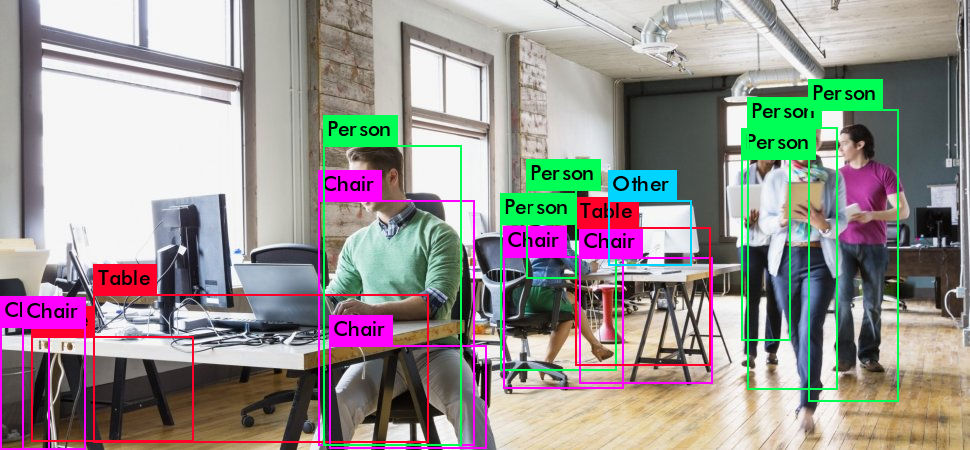

In [23]:
from IPython.display import Image
Image('predictions.jpg')

In [0]:
import darknet

# Initialize network, so init doesn't count in performance measurement
darknet.performDetect(imagePath="test_office.jpg", thresh=0.1, configPath = "cfg/yolo3-tiny-onlab.cfg", weightPath = "backup/yolo3-tiny-onlab_8000.weights", metaPath= "cfg/onlab.data", showImage= True, makeImageOnly = False, initOnly= True)


print(darknet.performDetect(imagePath="test_office.jpg", thresh=0.1, configPath = "cfg/yolo3-tiny-onlab.cfg", weightPath = "backup/yolo3-tiny-onlab_8000.weights", metaPath= "cfg/onlab.data", showImage= True, makeImageOnly = False, initOnly= False))

ValueError: ignored